<a href="https://colab.research.google.com/github/Ana-Ibarra/OpenClassroomProject/blob/alexnet_modified/P6_class_images_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

import keras

from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import History 
from keras.callbacks import ModelCheckpoint
from pathlib import Path
history = History()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Images are converted to squared form and saved in two folders: train and test

AS a first step, I changed the form of images, creating only sqared images, adding black parts to fullfil when rectangles. Then I saved them in "images_squared" folder.

In [ ]:
# def make_square(im, fill_color=(0, 0, 0, 0)):
#     x, y = im.size
#     size = max(x, y)
#     new_im = Image.new('RGB', (size, size), fill_color)
#     new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
#     return new_im

In [ ]:
# fpath = "/content/drive/My Drive/OC_P6_images/images_squared/"
# for index, category in enumerate(categories):
#     print(index, category) 
#     os.mkdir(fpath2+"/"+category)
#     for image_name in os.listdir(fpath+"/"+category): 
#         img = Image.open(fpath+"/"+category+"/"+image_name)
#         file_type = img.format
#         if img.size[0]!=img.size[1]:
#             img = make_square(img)
#         img.save(fpath2+"/"+category+"/"+image_name)

In [3]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        # plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

### Load dataset

In [6]:
fpath = "/content/drive/My Drive/OC_P6_images/images_squared_split/"
random_seed = 42
squared_size = 227
batch_size = 64
categories = os.listdir(fpath+"train")
print("List of categories = ", categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02087046-toy_terrier', 'n02085782-Japanese_spaniel', 'n02086079-Pekinese', 'n02086646-Blenheim_spaniel', 'n02086240-Shih-Tzu', 'n02085620-Chihuahua', 'n02088094-Afghan_hound', 'n02087394-Rhodesian_ridgeback', 'n02085936-Maltese_dog', 'n02086910-papillon', 'n02088238-basset', 'n02088466-bloodhound', 'n02088364-beagle', 'n02088632-bluetick', 'n02089867-Walker_hound', 'n02089078-black-and-tan_coonhound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091244-Ibizan_hound', 'n02091032-Italian_greyhound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091134-whippet', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093428-American_Staffordshire_terrier', 'n02093256-Staffordshire_bullterrier', 'n02093647-Bedlington_terrier', 'n02093859-Kerry_blue_terrier', 'n02093754-Border_terrier', 'n02094258-Norwich_terrier', 'n02094114-Norfolk_terrier', 'n02093991-Irish_terrier', 

In [7]:
train_ds = keras.preprocessing.image_dataset_from_directory(fpath+"train",
    labels="inferred",
    label_mode='int',
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(squared_size, squared_size),
    shuffle=True,
    seed=1,
    validation_split=0.25,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)

Found 16501 files belonging to 120 classes.
Using 12376 files for training.


In [8]:
val_ds = keras.preprocessing.image_dataset_from_directory(fpath+"train",
    labels="inferred",
    label_mode='int',
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(squared_size, squared_size),
    shuffle=True,
    seed=1,
    validation_split=0.25,
    subset="validation",
    interpolation="bilinear",
    follow_links=False)

Found 16501 files belonging to 120 classes.
Using 4125 files for validation.


In [9]:
test_ds = keras.preprocessing.image_dataset_from_directory(fpath+"test",
    labels="inferred",
    label_mode='int',
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(squared_size, squared_size),
    shuffle=True,
    seed=1,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 4080 files belonging to 120 classes.


In [16]:
class_names = train_ds.class_names
import pickle
with open(fpath+'dog_breeds', 'wb') as fp:
    pickle.dump(class_names, fp)

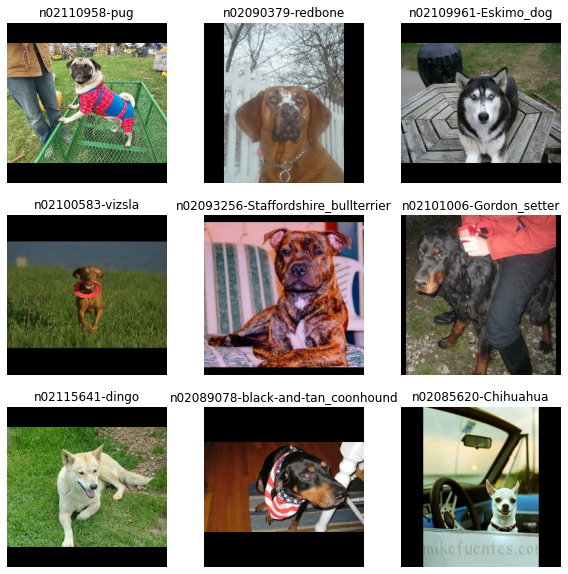

In [14]:


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
])

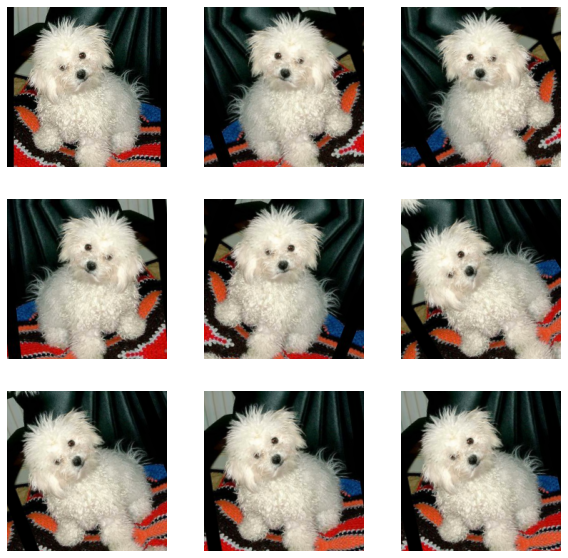

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
class_names = train_ds.class_names
print("No of classes in Training dataset: ", len(class_names))
class_names = val_ds.class_names
print("No of classes in Validation dataset: ", len(class_names))
class_names = test_ds.class_names
print("No of classes in Test dataset: ", len(class_names))

No of classes in Training dataset:  120
No of classes in Validation dataset:  120
No of classes in Test dataset:  120


# AlexNet CNN model

The architecture consists of eight layers: five convolutional layers and three fully-connected layers.

In [ ]:
model = Sequential()

# 1st Convolutional layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",
                 activation="relu",input_shape=(squared_size,squared_size,3)))
# Normalisation
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))
# Apply random data augmentation
model.add(keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model.add(keras.layers.experimental.preprocessing.RandomRotation(0.1))
# model.add(keras.layers.experimental.preprocessing.RandomTranslation(0.1,0.1))
# model.add(keras.layers.experimental.preprocessing.RandomContrast(0.1))
# Max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

# 2nd Convolutional layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),
                 padding="valid",activation="relu"))
# Max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())

# 3rd Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),
                 padding="valid",activation="relu"))

# 4th Convolutional layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),
                 padding="valid",activation="relu"))

# 5th Convolutional layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),
                 padding="valid",activation="relu"))
# Max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())

# 1st Dense layer
model.add(Dense(4096,input_shape=(squared_size,squared_size,3),
                activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# 2nd Dense layer
model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# 3rd Dense layer
model.add(Dense(1000,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())

# Output layer
model.add(Dense(len(categories),activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
rescaling (Rescaling)        (None, 54, 54, 96)        0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 54, 54, 96)        0         
_________________________________________________________________
random_rotation (RandomRotat (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       6

In [ ]:
# Compile the CNN model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:
commit = "AlexModNDA"

In [ ]:
epochs=150

callback_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# model.load_weights(checkpoint_filepath)

In [ ]:
%%time
history = model.fit(train_ds, validation_data = val_ds, epochs=epochs, callbacks=[callback_stop])

Epoch 1/150
194/194 [==============================] - 6308s 31s/step - loss: 5.4234 - accuracy: 0.0125 - val_loss: 4.7489 - val_accuracy: 0.0225
Epoch 2/150
194/194 [==============================] - 68s 344ms/step - loss: 5.0301 - accuracy: 0.0219 - val_loss: 7.5048 - val_accuracy: 0.0092
Epoch 3/150
194/194 [==============================] - 68s 343ms/step - loss: 4.8265 - accuracy: 0.0273 - val_loss: 4.8477 - val_accuracy: 0.0262
Epoch 4/150
194/194 [==============================] - 68s 342ms/step - loss: 4.6939 - accuracy: 0.0324 - val_loss: 5.2259 - val_accuracy: 0.0252
Epoch 5/150
194/194 [==============================] - 68s 346ms/step - loss: 4.5513 - accuracy: 0.0379 - val_loss: 4.4197 - val_accuracy: 0.0567
Epoch 6/150
194/194 [==============================] - 68s 342ms/step - loss: 4.4784 - accuracy: 0.0469 - val_loss: 5.1514 - val_accuracy: 0.0368
Epoch 7/150
194/194 [==============================] - 68s 342ms/step - loss: 4.3797 - accuracy: 0.0512 - val_loss: 4.7156 -

In [ ]:
# model.save(str("/content/drive/My Drive/OC_P6_images/images_squared_split/model"+commit+".h5"))
model = keras.models.load_model("/content/drive/My Drive/OC_P6_images/images_squared_split/modelAlexModNDA.h5")

In [ ]:
from pathlib import Path

# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

9902

In [ ]:
# Save neural network's trined weights
model_weights_alex = model.sample_weights(model_weights.h5)
# tf.keras.models.load_weights(checkpoint_filepath)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


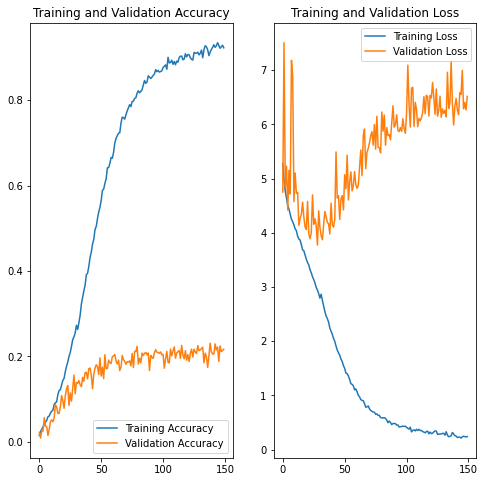

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=len(acc)
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# plt.savefig(str("/content/drive/My Drive/OC_P6_images/images_squared_split/model"+commit+".h5"))

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print(loss,accuracy)

64/64 [==============================] - 1781s 24s/step - loss: 6.7583 - accuracy: 0.2012
6.758345127105713 0.20122548937797546


### Pre-trained


Now we're going to change to another CNN pre-trained. First, resize the images, because now we need size=150.

In [ ]:
squared_size = 150
images, labels = read_resize(squared_size);
images = np.array(images)
labels = np.array(labels)
print("images shape:",images.shape)
print("labels shape:",labels.shape)

In [ ]:
# from tensorflow.keras import layers
# data_augmentation = keras.Sequential(
#         [layers.experimental.preprocessing.RandomFlip("horizontal"),
#          layers.experimental.preprocessing.RandomRotation(0.1)])

In [ ]:
# import numpy as np

# for images, labels in train_ds.take(1):
#     plt.figure(figsize=(10, 10))
#     first_image = images[0]
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         augmented_image = data_augmentation(
#             tf.expand_dims(first_image, 0), training=True
#         )
#         plt.imshow(augmented_image[0].numpy().astype("int32"))
#         plt.title(int(labels[i]))
#         plt.axis("off")

In [ ]:
# tf.keras.application.Xception.preprocessinginput

In [ ]:
base_model = keras.applications.Xception(
             weights="imagenet",  # Load weights pre-trained on ImageNet.
             input_shape=(squared_size, squared_size, 3),
             include_top=False)

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(squared_size, squared_size, 3))

# Apply random data augmentation
x = data_augmentation(inputs)  

x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation= "relu")(x)
# Regularize with dropout
x = keras.layers.Dropout(0.2)(x)  
outputs = keras.layers.Dense(len(categories),activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.fit(x_train, y_train, validation_data = (x_valid, y_valid), steps_per_epoch=35, epochs=20) # automatique
# history2 = model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

In [ ]:
# Unfreeze the base_model
base_model.trainable = True
model.summary()

model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

history2 = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), steps_per_epoch=20, epochs=10)